# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [50]:
!pip install tensorflow
import tensorflow as tf

In [51]:
import keras

In [52]:
print(f'tensorflow version:{tf.__version__}')
print(f'keras version:{keras.__version__}')

tensorflow version:2.14.0
keras version:2.14.0


# Q2. Load the Wine Quality dataset and explore its dimensions.

In [53]:
!pip install opendatasets

In [54]:
import opendatasets as od

In [55]:
od.download("https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification")

Skipping, found downloaded files in ".\wine-quality-binary-classification" (use force=True to force download)


In [56]:
import pandas as pd
df=pd.read_csv('wine-quality-binary-classification/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Q3. Check for null values, identify categorical variables, and encode them.

In [57]:
print(df.isnull().sum())
print('\n')
print(f'total null values:{df.isnull().sum().sum()}')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


total null values:0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [59]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [61]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Q4. Separate the features and target variables from the dataset.

In [62]:
X=df.drop(labels=['quality'],axis=1)
y=df['quality']
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

# Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [64]:
X_train,y_train

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 369             9.4             0.270         0.53             2.4      0.074   
 458            10.4             0.330         0.63             2.8      0.084   
 32              8.3             0.655         0.12             2.3      0.083   
 556            10.9             0.530         0.49             4.6      0.118   
 145             8.1             0.670         0.55             1.8      0.117   
 ...             ...               ...          ...             ...        ...   
 163             7.4             0.600         0.26             7.3      0.070   
 607             8.8             0.480         0.41             3.3      0.092   
 1568            7.0             0.560         0.13             1.6      0.077   
 414             8.8             0.520         0.34             2.7      0.087   
 971            10.4             0.260         0.48             1.9      0.066   
 
       free su

# Q6. Scale the dataset using an appropriate scaling technique.

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [66]:
from keras import layers

In [67]:
Layers=[
    layers.Flatten(input_shape=(X_train.shape[1],)),
    layers.Dense(64,activation='relu',name='hidden1'),
    layers.Dense(32,activation='relu',name='hidden2'),
    layers.Dense(1,activation='sigmoid',name='outputlayer')
]

# Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [68]:
model=keras.Sequential(Layers)
model.layers

# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [69]:
# from keras.callbacks import TensorBoard
log_folder='logs'
%load_ext tensorboard
tb_callback=keras.callbacks.TensorBoard(log_dir=log_folder,histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [70]:
tensorboard --logdir={log_folder}

Reusing TensorBoard on port 6006 (pid 11276), started 0:20:44 ago. (Use '!kill 11276' to kill it.)

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [71]:
early_stop_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [72]:
CKPT_path="model_chkpt"
checkpt_cb=keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

# Q12. Print the summary of the model architecture.

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 hidden1 (Dense)             (None, 64)                768       
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 outputlayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q13. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [74]:
Loss_fn='binary_crossentropy'
opt='Adam'
met=['accuracy']

# Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [75]:
model.compile(
loss=Loss_fn,
optimizer=opt,
metrics=met)

# Q15. Fit the model to the training data using appropriate batch size and number of epochs.

In [76]:
epochs=30
valid_set=(X_test,y_test)

history=model.fit(X_train,y_train,epochs=epochs, validation_data=valid_set,batch_size=32,
                 callbacks=[tb_callback,early_stop_cb,checkpt_cb])

Epoch 1/30
34/40 [========================>.....] - ETA: 0s - loss: 0.6253 - accuracy: 0.6590INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 3s 33ms/step - loss: 0.6154 - accuracy: 0.6708 - val_loss: 0.5345 - val_accuracy: 0.7344
Epoch 2/30
40/40 [==============================] - ETA: 0s - loss: 0.5436 - accuracy: 0.7357INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 25ms/step - loss: 0.5436 - accuracy: 0.7357 - val_loss: 0.4968 - val_accuracy: 0.7594
Epoch 3/30
39/40 [============================>.] - ETA: 0s - loss: 0.5235 - accuracy: 0.7308INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.5227 - accuracy: 0.7310 - val_loss: 0.4874 - val_accuracy: 0.7688
Epoch 4/30
40/40 [==============================] - ETA: 0s - loss: 0.5120 - accuracy: 0.7490INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.5120 - accuracy: 0.7490 - val_loss: 0.4776 - val_accuracy: 0.7781
Epoch 5/30
40/40 [==============================] - ETA: 0s - loss: 0.5051 - accuracy: 0.7412INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 23ms/step - loss: 0.5051 - accuracy: 0.7412 - val_loss: 0.4731 - val_accuracy: 0.7844
Epoch 6/30
39/40 [============================>.] - ETA: 0s - loss: 0.4977 - accuracy: 0.7532INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 23ms/step - loss: 0.4966 - accuracy: 0.7522 - val_loss: 0.4703 - val_accuracy: 0.7937
Epoch 7/30
39/40 [============================>.] - ETA: 0s - loss: 0.4924 - accuracy: 0.7588INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 23ms/step - loss: 0.4906 - accuracy: 0.7600 - val_loss: 0.4661 - val_accuracy: 0.7937
Epoch 8/30
21/40 [==============>...............] - ETA: 0s - loss: 0.4717 - accuracy: 0.7783INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 23ms/step - loss: 0.4860 - accuracy: 0.7592 - val_loss: 0.4596 - val_accuracy: 0.7844
Epoch 9/30
37/40 [==========================>...] - ETA: 0s - loss: 0.4750 - accuracy: 0.7601INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 25ms/step - loss: 0.4819 - accuracy: 0.7576 - val_loss: 0.4593 - val_accuracy: 0.7937
Epoch 10/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4792 - accuracy: 0.7576 - val_loss: 0.4617 - val_accuracy: 0.7906
Epoch 11/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4740 - accuracy: 0.7608 - val_loss: 0.4594 - val_accuracy: 0.7937
Epoch 12/30
20/40 [==============>...............] - ETA: 0s - loss: 0.4931 - accuracy: 0.7547INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 36ms/step - loss: 0.4737 - accuracy: 0.7623 - val_loss: 0.4564 - val_accuracy: 0.7812
Epoch 13/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4702 - accuracy: 0.7678 - val_loss: 0.4627 - val_accuracy: 0.7969
Epoch 14/30
40/40 [==============================] - ETA: 0s - loss: 0.4655 - accuracy: 0.7686INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.4655 - accuracy: 0.7686 - val_loss: 0.4560 - val_accuracy: 0.7937
Epoch 15/30
40/40 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.7764INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 23ms/step - loss: 0.4614 - accuracy: 0.7764 - val_loss: 0.4529 - val_accuracy: 0.8000
Epoch 16/30
38/40 [===========================>..] - ETA: 0s - loss: 0.4561 - accuracy: 0.7829INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 25ms/step - loss: 0.4608 - accuracy: 0.7756 - val_loss: 0.4493 - val_accuracy: 0.7906
Epoch 17/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.7670 - val_loss: 0.4699 - val_accuracy: 0.7875
Epoch 18/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4558 - accuracy: 0.7748 - val_loss: 0.4608 - val_accuracy: 0.7906
Epoch 19/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4544 - accuracy: 0.7772 - val_loss: 0.4507 - val_accuracy: 0.8031
Epoch 20/30
21/40 [==============>...............] - ETA: 0s - loss: 0.4545 - accuracy: 0.7872INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 22ms/step - loss: 0.4492 - accuracy: 0.7850 - val_loss: 0.4479 - val_accuracy: 0.8094
Epoch 21/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4446 - accuracy: 0.7819 - val_loss: 0.4485 - val_accuracy: 0.8000
Epoch 22/30
35/40 [=========================>....] - ETA: 0s - loss: 0.4476 - accuracy: 0.7857INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.4427 - accuracy: 0.7889 - val_loss: 0.4469 - val_accuracy: 0.7969
Epoch 23/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4392 - accuracy: 0.7858 - val_loss: 0.4482 - val_accuracy: 0.8031
Epoch 24/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4389 - accuracy: 0.7858 - val_loss: 0.4482 - val_accuracy: 0.7937
Epoch 25/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4334 - accuracy: 0.7897 - val_loss: 0.4484 - val_accuracy: 0.7812
Epoch 26/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4346 - accuracy: 0.7920 - val_loss: 0.4521 - val_accuracy: 0.7906
Epoch 27/30
36/40 [==========================>...] - ETA: 0s - loss: 0.4214 - accuracy: 0.7960INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 23ms/step - loss: 0.4301 - accuracy: 0.7920 - val_loss: 0.4453 - val_accuracy: 0.7875
Epoch 28/30
39/40 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.7981INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.4250 - accuracy: 0.7959 - val_loss: 0.4446 - val_accuracy: 0.7906
Epoch 29/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4225 - accuracy: 0.7998 - val_loss: 0.4471 - val_accuracy: 0.8000
Epoch 30/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4220 - accuracy: 0.7998 - val_loss: 0.4500 - val_accuracy: 0.7781


In [77]:
ckpt_model=keras.models.load_model(CKPT_path)
history=ckpt_model.fit(X_train,y_train,epochs=epochs, validation_data=valid_set,batch_size=32,
                 callbacks=[tb_callback,early_stop_cb,checkpt_cb])

Epoch 1/30
37/40 [==========================>...] - ETA: 0s - loss: 0.4287 - accuracy: 0.7931INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 2s 31ms/step - loss: 0.4265 - accuracy: 0.7936 - val_loss: 0.4443 - val_accuracy: 0.7844
Epoch 2/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4204 - accuracy: 0.7991 - val_loss: 0.4584 - val_accuracy: 0.7937
Epoch 3/30
40/40 [==============================] - 0s 7ms/step - loss: 0.4216 - accuracy: 0.8030 - val_loss: 0.4501 - val_accuracy: 0.7937
Epoch 4/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4153 - accuracy: 0.8069 - val_loss: 0.4568 - val_accuracy: 0.7906
Epoch 5/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8069 - val_loss: 0.4497 - val_accuracy: 0.7844
Epoch 6/30
38/40 [===========================>..] - ETA: 0s - loss: 0.4091 - accuracy: 0.8051INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.4118 - accuracy: 0.8014 - val_loss: 0.4440 - val_accuracy: 0.7812
Epoch 7/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8053 - val_loss: 0.4446 - val_accuracy: 0.7906
Epoch 8/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4047 - accuracy: 0.8092 - val_loss: 0.4522 - val_accuracy: 0.8000
Epoch 9/30
21/40 [==============>...............] - ETA: 0s - loss: 0.4134 - accuracy: 0.7932INFO:tensorflow:Assets written to: model_chkpt\assets


INFO:tensorflow:Assets written to: model_chkpt\assets


40/40 [==============================] - 1s 24ms/step - loss: 0.4035 - accuracy: 0.8100 - val_loss: 0.4408 - val_accuracy: 0.7844
Epoch 10/30
40/40 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8178 - val_loss: 0.4491 - val_accuracy: 0.7969
Epoch 11/30
40/40 [==============================] - 0s 6ms/step - loss: 0.3966 - accuracy: 0.8139 - val_loss: 0.4411 - val_accuracy: 0.7875
Epoch 12/30
40/40 [==============================] - 0s 6ms/step - loss: 0.3966 - accuracy: 0.8178 - val_loss: 0.4482 - val_accuracy: 0.7937
Epoch 13/30
40/40 [==============================] - 0s 6ms/step - loss: 0.3900 - accuracy: 0.8163 - val_loss: 0.4496 - val_accuracy: 0.7875
Epoch 14/30
40/40 [==============================] - 0s 6ms/step - loss: 0.3912 - accuracy: 0.8194 - val_loss: 0.4535 - val_accuracy: 0.7937


In [78]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [79]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH 

Model Model_2023_10_23_01_45_08_.h5 will be saved at TRAINED_MODEL\Model_2023_10_23_01_45_08_.h5


'TRAINED_MODEL\\Model_2023_10_23_01_45_08_.h5'

In [80]:
keras.models.save_model(model, UNIQUE_PATH)

C:\Users\inder\AppData\Local\Temp\ipykernel_20024\1331571554.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, UNIQUE_PATH)


# Q16. Obtain the model's parameters (weights and biases).

In [81]:
for x in model.layers:
    if len(x.get_weights())>0:
        weights, biases = x.get_weights()
        print(f"Layer {x.name}:")
        print(f"Weights: {weights}")
        print(f"Biases: {biases}")
        print(f"Shape: {weights.shape}")

Layer hidden1:
Weights: [[-2.50926971e-01 -2.33549178e-01 -5.07669263e-02 -2.88491637e-01
   1.27288133e-01 -9.12136659e-02  2.39240095e-01 -2.19244227e-01
   7.99698289e-03  1.92054778e-01  2.26915404e-01  1.93840172e-02
  -1.83716074e-01  1.77420639e-02 -1.15776747e-01  1.45476103e-01
   6.69498965e-02  2.60507524e-01  2.01356068e-01  1.99041590e-01
  -7.92575479e-02 -4.61928211e-02  1.22475952e-01  2.76103437e-01
   1.33472532e-01 -1.19459480e-01  7.35339373e-02 -3.05457354e-01
   2.55196899e-01 -2.69384474e-01 -9.35901627e-02  1.05390780e-01
   2.26037398e-01 -1.66858416e-02  3.33817244e-01  1.68416202e-01
   9.41480398e-02  8.58293995e-02  4.09005806e-02  2.06055954e-01
   1.61113873e-01 -9.89078805e-02  1.99246302e-01  2.36966789e-01
  -8.09697211e-02  7.87142012e-03 -3.48017901e-01  2.27511138e-01
   2.29457498e-01 -1.01004072e-01  6.70939833e-02 -1.69685975e-01
   2.80027956e-01 -8.44040234e-03 -1.64907634e-01 -1.05549134e-01
  -2.11722985e-01  8.66154507e-02  1.97741762e-01 -1

# Q17. Store the model's training history as a Pandas DataFrame.

In [82]:
x=pd.DataFrame(history.history)
x

,loss,accuracy,val_loss,val_accuracy
0,0.426543,0.793589,0.444337,0.784375
1,0.420391,0.799062,0.458376,0.793750
2,0.421579,0.802971,0.450058,0.793750
3,0.415290,0.806880,0.456752,0.790625
4,0.412255,0.806880,0.449688,0.784375
5,0.411759,0.801407,0.444008,0.781250
6,0.410522,0.805317,0.444604,0.790625
7,0.404677,0.809226,0.452162,0.800000
8,0.403525,0.810008,0.440779,0.784375
9,0.399486,0.817826,0.449092,0.796875


# Q18. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

<Axes: >

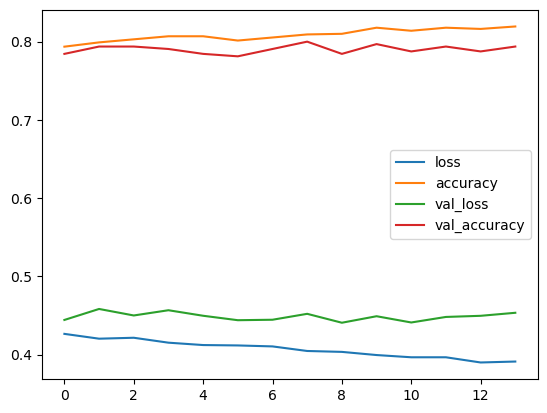

In [83]:
x.plot()

# Q19. Evaluate the model's performance using the test dataset and report relevant metrics.

In [84]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7781


[0.44997113943099976, 0.778124988079071]

In [85]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [86]:
y_pred

array([[0.8895189 ],
       [0.86728346],
       [0.1244393 ],
       [0.92297596],
       [0.82988995],
       [0.90722084],
       [0.91038126],
       [0.7612416 ],
       [0.2513726 ],
       [0.05835068],
       [0.25819513],
       [0.31387687],
       [0.655318  ],
       [0.9154931 ],
       [0.75120056],
       [0.9620926 ],
       [0.7708716 ],
       [0.91430837],
       [0.87392193],
       [0.20869927],
       [0.5068419 ],
       [0.31467277],
       [0.2292791 ],
       [0.21401036],
       [0.8303913 ],
       [0.2549289 ],
       [0.4945136 ],
       [0.99132293],
       [0.78429   ],
       [0.93323463],
       [0.97806877],
       [0.1801772 ],
       [0.94329655],
       [0.23071323],
       [0.42712477],
       [0.87782985],
       [0.4732586 ],
       [0.552416  ],
       [0.7365412 ],
       [0.72375387],
       [0.4327363 ],
       [0.90780467],
       [0.03047381],
       [0.34935996],
       [0.4793537 ],
       [0.7880183 ],
       [0.5802148 ],
       [0.878

In [87]:
y_pred=y_pred.round().flatten()

In [88]:
y_pred

array([1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [89]:
y_test

69      1
1541    1
368     0
559     1
249     1
       ..
1426    1
179     0
417     0
1298    1
1062    1
Name: quality, Length: 320, dtype: int32